<a href="https://colab.research.google.com/github/ajinkyajumde/CNN-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import cv2
import os


In [73]:
image=image.load_img('/content/drive/MyDrive/Almabetter projects/cnn/cnn1/training/modi/th.jpg')

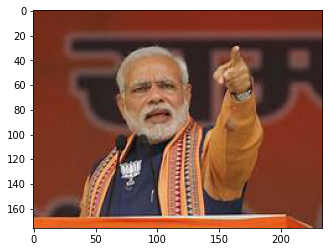

In [74]:
plt.imshow(image)

In [75]:
cv2.imread('/content/drive/MyDrive/Almabetter projects/cnn/cnn1/training/modi/th.jpg')

array([[[ 26,  42, 118],
        [ 26,  42, 118],
        [ 26,  42, 118],
        ...,
        [ 26,  43, 130],
        [ 22,  39, 126],
        [ 22,  39, 126]],

       [[ 26,  42, 118],
        [ 26,  42, 118],
        [ 26,  42, 118],
        ...,
        [ 26,  43, 130],
        [ 24,  41, 128],
        [ 24,  41, 128]],

       [[ 26,  42, 118],
        [ 26,  42, 118],
        [ 26,  42, 118],
        ...,
        [ 25,  42, 128],
        [ 25,  42, 128],
        [ 25,  42, 128]],

       ...,

       [[ 38,  99, 239],
        [ 37,  99, 237],
        [ 35,  97, 237],
        ...,
        [ 87,  91, 120],
        [ 80,  83, 111],
        [ 82,  83, 109]],

       [[ 46, 101, 236],
        [ 46, 102, 235],
        [ 44, 100, 235],
        ...,
        [ 81,  85, 114],
        [ 82,  85, 113],
        [ 84,  85, 111]],

       [[ 48, 100, 231],
        [ 48, 100, 231],
        [ 46, 100, 231],
        ...,
        [ 86,  90, 119],
        [ 83,  86, 114],
        [ 85,  86, 112]]

In [76]:
cv2.imread('/content/drive/MyDrive/Almabetter projects/cnn/cnn1/training/modi/th.jpg').shape

(176, 234, 3)

In [77]:
train=ImageDataGenerator(rescale=1/225)
validation=ImageDataGenerator(rescale=1/225)

In [78]:
train_df=train.flow_from_directory('/content/drive/MyDrive/Almabetter projects/cnn/cnn1/training',
                                   target_size=(200,200),
                                   batch_size=5,
                                   class_mode='binary')

Found 77 images belonging to 2 classes.


In [79]:
validation_df=train.flow_from_directory('/content/drive/MyDrive/Almabetter projects/cnn/cnn1/testing',
                                   target_size=(200,200),
                                   batch_size=5,
                                   class_mode='binary')

Found 13 images belonging to 2 classes.


In [80]:
train_df.class_indices

{'modi': 0, 'trump': 1}

In [81]:
train_df.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [82]:
validation_df.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [90]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')                                  
                                  ])

In [91]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [92]:
model.fit(train_df, epochs=20, validation_data=validation_df)

Epoch 1/20
16/16 [==============================] - 32s 2s/step - loss: 2.2985 - accuracy: 0.4805 - val_loss: 0.6376 - val_accuracy: 0.7692
Epoch 2/20
16/16 [==============================] - 12s 724ms/step - loss: 0.5454 - accuracy: 0.7662 - val_loss: 0.5557 - val_accuracy: 0.6923
Epoch 3/20
16/16 [==============================] - 10s 632ms/step - loss: 0.3100 - accuracy: 0.8961 - val_loss: 0.4383 - val_accuracy: 0.8462
Epoch 4/20
16/16 [==============================] - 11s 661ms/step - loss: 0.4035 - accuracy: 0.8571 - val_loss: 0.5918 - val_accuracy: 0.6923
Epoch 5/20
16/16 [==============================] - 11s 654ms/step - loss: 0.1687 - accuracy: 0.9091 - val_loss: 2.9867 - val_accuracy: 0.6923
Epoch 6/20
16/16 [==============================] - 11s 688ms/step - loss: 0.1865 - accuracy: 0.9740 - val_loss: 1.1097 - val_accuracy: 0.6923
Epoch 7/20
16/16 [==============================] - 11s 712ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.7290 - val_accuracy: 0.7692
Ep

In [93]:
loss, accuracy = model.evaluate(validation_df)
print("Loss:", loss)
print("Accuracy:", accuracy)

3/3 [==============================] - 1s 212ms/step - loss: 2.4146 - accuracy: 0.8462
Loss: 2.414553642272949
Accuracy: 0.8461538553237915


In [100]:
test_image = cv2.resize(cv2.imread("/content/drive/MyDrive/Almabetter projects/cnn/modi.jpg"),  (200,200))

model.predict(test_image)

ValueError: ignored